In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import pearsonr

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import plotly.express as px
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score ,roc_curve ,auc
from explainerdashboard import RegressionExplainer, ExplainerDashboard
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import pearsonr

In [3]:
df = pd.read_csv('hope_final.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4061 entries, 0 to 4060
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4061 non-null   int64  
 1   Company Name         4061 non-null   object 
 2   Job Title            4061 non-null   object 
 3   Job Description      4061 non-null   object 
 4   Years of Experience  4061 non-null   float64
 5   Location             4061 non-null   object 
 6   Job Type             4061 non-null   object 
 7   Level                4061 non-null   object 
 8   Categories           4061 non-null   object 
 9   python               4061 non-null   int64  
 10  R                    4061 non-null   int64  
 11  spark                4061 non-null   int64  
 12  aws                  4061 non-null   int64  
 13  excel                4061 non-null   int64  
 14  tableau              4061 non-null   int64  
 15  power_bi             4061 non-null   i

In [5]:
df['Location'].value_counts()

Mumbai                893
Bangalore             575
Pune                  515
Bengaluru             501
Hyderābād             243
Remote                208
Chennai               151
Hyderabad             136
Gurgaon               126
Noida                 112
India                  94
Delhi                  77
New Delhi              62
Thiruvananthapuram     41
Mohali                 36
Vadodara               35
Nashik                 31
Calicut                30
Lucknow                30
Ludhiana               30
Kālkāji Devi           30
Kolkata                15
Kochi                  14
Indore                 10
Ahmedabad               9
Jaipur                  8
Telangana               5
Gurugram                5
Ernakulam               4
Chandigarh              4
Thane                   4
Coimbatore              3
Bhubaneshwar            3
Cannanore               2
Secunderabad            2
Kerala                  2
Vijayawada              2
Vellore                 2
Tiruchchirap

In [6]:
df['Location'].replace('Bengaluru', 'Bangalore', inplace = True)
df['Location'].replace('Gurugram', 'Gurgaon', inplace = True)
df['Location'].replace('Hyderābād', 'Hyderabad', inplace = True)
df['Location'].replace('India', 'Remote', inplace = True)
df['Location'].replace('Maharashtra	', 'Mumbai	', inplace = True)

In [7]:
df['Location'].value_counts()

Bangalore             1076
Mumbai                 893
Pune                   515
Hyderabad              379
Remote                 302
Chennai                151
Gurgaon                131
Noida                  112
Delhi                   77
New Delhi               62
Thiruvananthapuram      41
Mohali                  36
Vadodara                35
Nashik                  31
Kālkāji Devi            30
Ludhiana                30
Calicut                 30
Lucknow                 30
Kolkata                 15
Kochi                   14
Indore                  10
Ahmedabad                9
Jaipur                   8
Telangana                5
Thane                    4
Ernakulam                4
Chandigarh               4
Bhubaneshwar             3
Coimbatore               3
Vellore                  2
Secunderabad             2
Kerala                   2
Tiruchchirappalli        2
Vijayawada               2
Cannanore                2
Maharashtra              1
Mysore                   1
T

In [8]:
# Independent Variable: Analysis

df.groupby("Categories").agg({"avg_salary": "median"}).sort_values('avg_salary', ascending = False)

,avg_salary
Categories,
Data Engineer,11.627546
Developer,9.537267
Architect,9.512343
Data Base Management,9.512343
Data Scientist,9.500000
Consultant,8.892957
Big Data Analyst,8.857252
Business Analytics,8.103528
AI Specialist,7.500000


In [9]:
df.groupby("Level").agg({"avg_salary": "median"})

,avg_salary
Level,
Advance,15.160239
Entry,5.770436
Mid,8.000000


In [10]:
df.groupby("Location").agg({"avg_salary": "median"}).sort_values('avg_salary', ascending = False)

,avg_salary
Location,
Hosur,22.500000
Bhubaneshwar,19.271293
Mysore,15.835965
Bhopal,15.747517
Udaipur,15.747517
Cannanore,13.926693
Vijayawada,11.987708
Noida,11.000000
Thane,10.813991


In [11]:
df.groupby(["Categories","Level"]).agg({"avg_salary": "median"})

avg_salary
Categories            Level              
AI Specialist         Advance   11.500000
                      Entry      5.594284
                      Mid        7.500000
Architect             Advance   13.613761
                      Mid        8.755332
Big Data Analyst      Advance   12.249238
                      Entry      6.105507
                      Mid        9.184797
Business Analytics    Advance   10.205235
                      Entry      8.103528
                      Mid        7.099763
Consultant            Advance   14.770855
                      Entry      7.131056
                      Mid        9.512343
Data Analyst          Advance   15.045758
                      Entry      3.360000
                      Mid        6.500000
Data Base Management  Advance   15.570311
                      Entry      4.350741
                      Mid        9.512343
Data Engineer         Advance   19.749859
                      Entry      5.594284
                      Mid        9.217112
Data Scientist        Advance   13.984339
                      Entry      6.500000
                      Mid        8.755332
Developer             Advance   15.791741
                      Entry      5.770436
                      Mid        9.537267
Statiticians/Research Advance   15.498102
                      Entry      8.000000
                      Mid        5.220000

In [12]:
df.Location.value_counts()

Bangalore             1076
Mumbai                 893
Pune                   515
Hyderabad              379
Remote                 302
Chennai                151
Gurgaon                131
Noida                  112
Delhi                   77
New Delhi               62
Thiruvananthapuram      41
Mohali                  36
Vadodara                35
Nashik                  31
Kālkāji Devi            30
Ludhiana                30
Calicut                 30
Lucknow                 30
Kolkata                 15
Kochi                   14
Indore                  10
Ahmedabad                9
Jaipur                   8
Telangana                5
Thane                    4
Ernakulam                4
Chandigarh               4
Bhubaneshwar             3
Coimbatore               3
Vellore                  2
Secunderabad             2
Kerala                   2
Tiruchchirappalli        2
Vijayawada               2
Cannanore                2
Maharashtra              1
Mysore                   1
T

In [13]:
pd.pivot_table(df[df.Location == 'Bangalore'], index = 'Categories', values = 'avg_salary',aggfunc='median').sort_values('avg_salary', ascending = False)

,avg_salary
Categories,
Data Engineer,15.498102
Consultant,14.000000
Architect,9.537267
Data Base Management,9.512343
Data Scientist,9.512343
Developer,8.755332
Big Data Analyst,8.627666
AI Specialist,7.500000
Data Analyst,7.234361


In [14]:
pd.pivot_table(df[df.Location == 'Mumbai'], index = 'Categories', values = 'avg_salary',aggfunc='median').sort_values('avg_salary', ascending = False)

,avg_salary
Categories,
Statiticians/Research,13.078679
Developer,11.518633
Consultant,9.763438
Big Data Analyst,9.512343
Data Engineer,8.273570
Data Scientist,8.273570
Data Analyst,6.500000
Business Analytics,6.227577
AI Specialist,5.594284


In [15]:
pd.pivot_table(df[df.Location == 'Pune'], index = 'Categories', values = 'avg_salary',aggfunc='median').sort_values('avg_salary', ascending = False)

,avg_salary
Categories,
Business Analytics,10.205235
Data Engineer,9.537267
Big Data Analyst,9.512343
Data Scientist,9.500000
Architect,8.755332
Developer,8.431600
Data Base Management,8.273570
AI Specialist,7.500000
Consultant,7.131056


In [16]:
pd.pivot_table(df[df.Location == 'Hyderabad'], index = 'Categories', values = 'avg_salary',aggfunc='median').sort_values('avg_salary', ascending = False)

,avg_salary
Categories,
Data Engineer,27.500000
Big Data Analyst,15.835965
Architect,9.763438
Data Base Management,9.537267
Business Analytics,9.436440
Developer,8.743051
Data Scientist,8.417395
Consultant,8.273570
AI Specialist,7.607744


In [17]:
pd.pivot_table(df[df.Level == 'Entry'], index = 'Categories', values = 'avg_salary',aggfunc='median').sort_values('avg_salary', ascending = False)

,avg_salary
Categories,
Business Analytics,8.103528
Statiticians/Research,8.000000
Consultant,7.131056
Data Scientist,6.500000
Big Data Analyst,6.105507
Developer,5.770436
AI Specialist,5.594284
Data Engineer,5.594284
Data Base Management,4.350741


In [18]:
pd.pivot_table(df[df.Level == 'Mid'], index = 'Categories', values = 'avg_salary',aggfunc='median').sort_values('avg_salary', ascending = False)

,avg_salary
Categories,
Developer,9.537267
Consultant,9.512343
Data Base Management,9.512343
Data Engineer,9.217112
Big Data Analyst,9.184797
Architect,8.755332
Data Scientist,8.755332
AI Specialist,7.500000
Business Analytics,7.099763


In [19]:
pd.pivot_table(df[df.Level == 'Advance'], index = 'Categories', values = 'avg_salary',aggfunc='median').sort_values('avg_salary', ascending = False)

,avg_salary
Categories,
Data Engineer,19.749859
Developer,15.791741
Data Base Management,15.570311
Statiticians/Research,15.498102
Data Analyst,15.045758
Consultant,14.770855
Data Scientist,13.984339
Architect,13.613761
Big Data Analyst,12.249238


In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


<AxesSubplot:xlabel='avg_salary', ylabel='Count'>

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


<AxesSubplot:xlabel='avg_salary', ylabel='Count'>

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


<AxesSubplot:xlabel='avg_salary', ylabel='Count'>

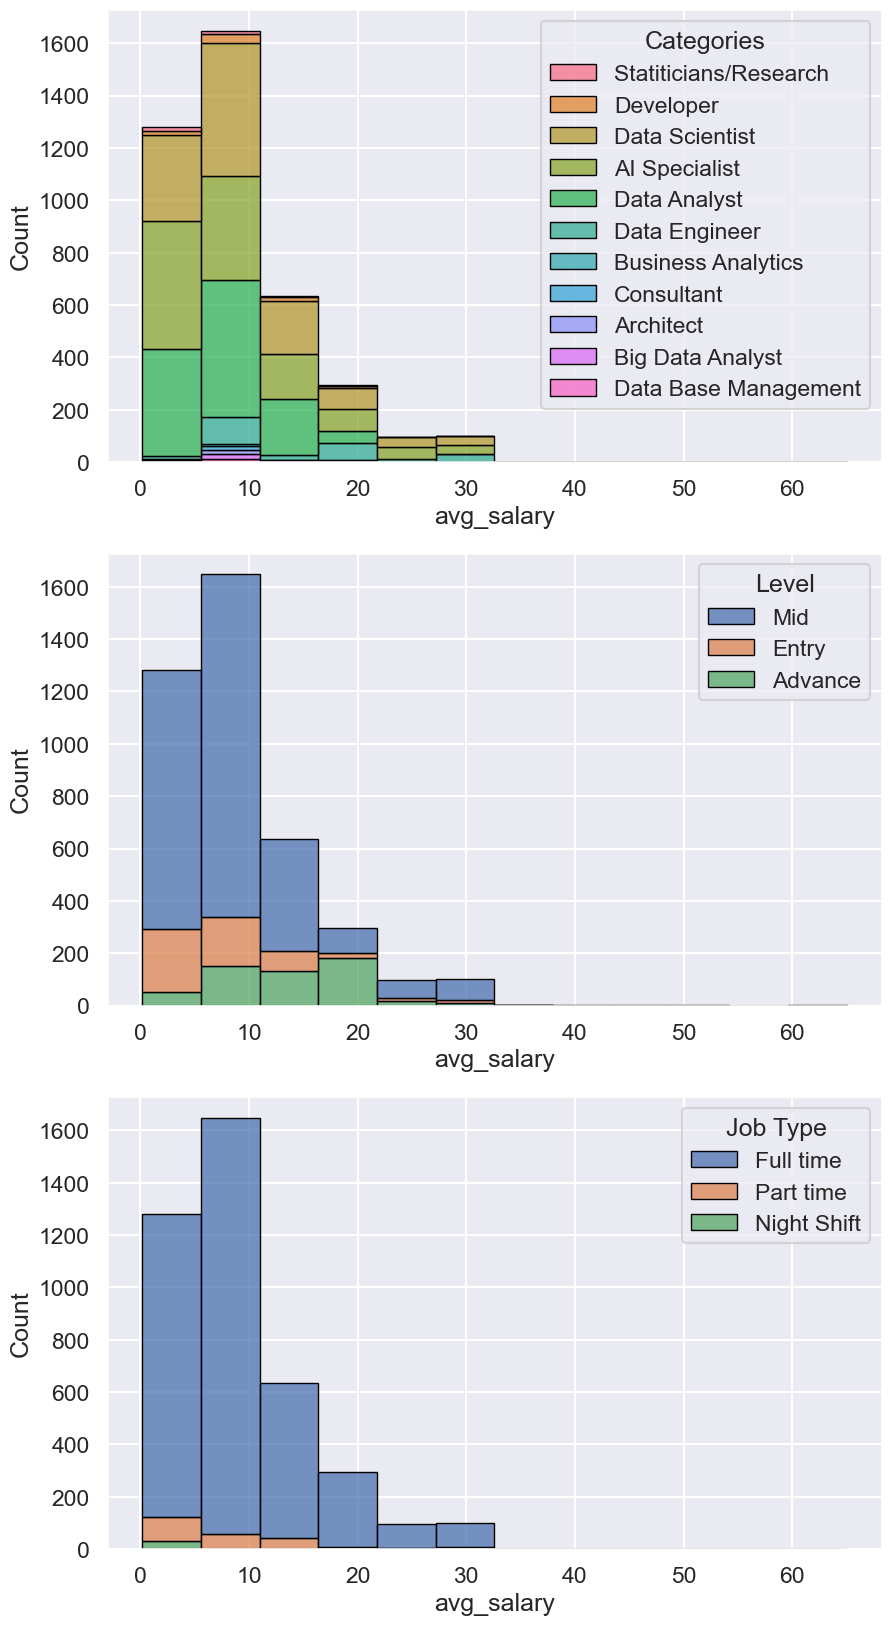

In [20]:
# Illustrating the impact of all Categories, Levels, Job Type on the 'Salary'
sns.set_theme("talk", font_scale=1.0)
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))
fig.set_facecolor("#fff")
for i, c in enumerate(['Categories', 'Level', 'Job Type']):
    sns.histplot(x="avg_salary", hue=c, data=df, bins=12, multiple='stack', ax=axs[i], edgecolor="#000", linewidth=1);

In [21]:
df[['avg_salary','ratings','Years of Experience']].corr()

,avg_salary,ratings,Years of Experience
avg_salary,1.000000,0.008502,0.248949
ratings,0.008502,1.000000,-0.075520
Years of Experience,0.248949,-0.075520,1.000000


In [22]:
df_1 = df.drop(['Unnamed: 0','Company Name', 'Job Title','Job Description'], axis=1)
df_1.head()

,Years of Experience,Location,Job Type,Level,Categories,python,R,spark,aws,excel,...,sql,nosql,mongodb,scala,ml,ai,nlp,deep_learning,ratings,avg_salary
0,2.0,Bangalore,Full time,Mid,Statiticians/Research,1,0,0,0,0,...,0,0,0,0,1,1,0,0,4.500000,4.00
1,3.0,Remote,Full time,Mid,Developer,0,0,0,0,0,...,0,0,0,0,1,1,0,0,4.221543,21.50
2,2.0,Mumbai,Full time,Mid,Data Scientist,0,0,0,0,1,...,0,0,0,0,1,1,0,0,4.200000,0.96
3,2.0,Mumbai,Full time,Mid,AI Specialist,1,0,0,0,1,...,0,0,0,0,1,1,0,0,3.883892,11.00
4,5.0,Pune,Full time,Mid,AI Specialist,1,0,1,0,0,...,0,0,0,1,1,1,0,1,4.056668,2.00


In [23]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4061 entries, 0 to 4060
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  4061 non-null   float64
 1   Location             4061 non-null   object 
 2   Job Type             4061 non-null   object 
 3   Level                4061 non-null   object 
 4   Categories           4061 non-null   object 
 5   python               4061 non-null   int64  
 6   R                    4061 non-null   int64  
 7   spark                4061 non-null   int64  
 8   aws                  4061 non-null   int64  
 9   excel                4061 non-null   int64  
 10  tableau              4061 non-null   int64  
 11  power_bi             4061 non-null   int64  
 12  hadoop               4061 non-null   int64  
 13  azure                4061 non-null   int64  
 14  cloud                4061 non-null   int64  
 15  big_data             4061 non-null   i

In [24]:
df_1 = pd.get_dummies(df_1, columns = ['Location', 'Job Type', 'Level', 'Categories'], drop_first=True)
df_1.head()

,Years of Experience,python,R,spark,aws,excel,tableau,power_bi,hadoop,azure,...,Categories_Architect,Categories_Big Data Analyst,Categories_Business Analytics,Categories_Consultant,Categories_Data Analyst,Categories_Data Base Management,Categories_Data Engineer,Categories_Data Scientist,Categories_Developer,Categories_Statiticians/Research
0,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.utils import shuffle

df_1 = shuffle(df_1, random_state=42)

In [26]:
Q1 = df_1["avg_salary"].quantile(0.25)
Q3 = df_1["avg_salary"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

6.5


In [27]:
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)

In [28]:
d = df_1.loc[(df_1["avg_salary"] < Lower_Fence) | (df_1["avg_salary"] > Upper_Fence),:]

In [29]:
df_1 = df_1.drop(d.index, axis = 0)

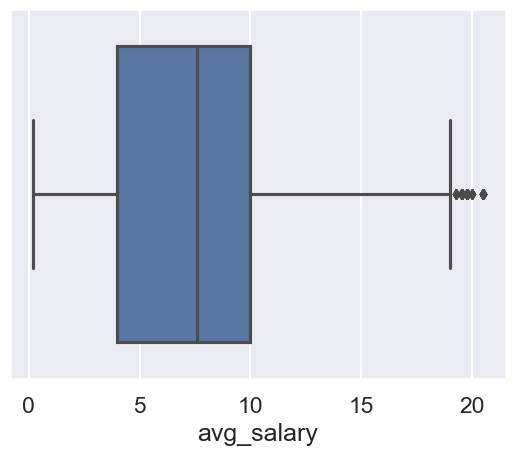

In [30]:
sns.boxplot(x = df_1["avg_salary"]);



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



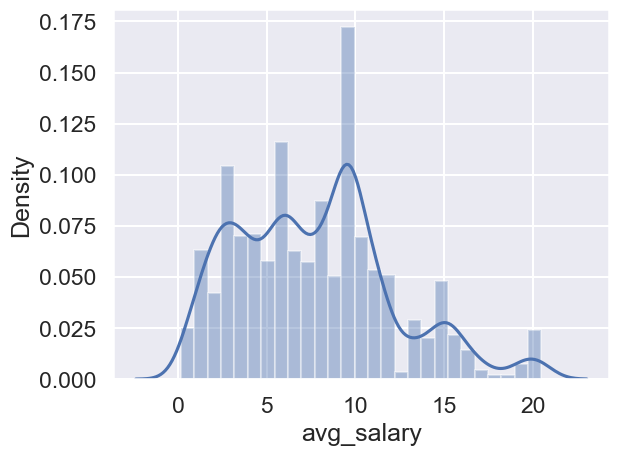

In [31]:
sns.distplot(df_1['avg_salary']);

In [32]:
# Declare the dependent and independent variables
X = df_1.drop('avg_salary', axis = 1)
y = df_1['avg_salary'].values

In [33]:
# multiple linear regression 
import statsmodels.api as sm
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     18.14
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          5.26e-204
Time:                        21:04:22   Log-Likelihood:                -10149.
No. Observations:                3711   AIC:                         2.046e+04
Df Residuals:                    3631   BIC:                         2.096e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               13.2233      1.522      8.686      0.000      10.238      16.208
Years of Experience                  0.1846      0.054      3.396      0.001       0.078       0.291
python                              -0.0565      0.177     -0.319      0.750      -0.404       0.291
R                                    0.0129      1.571      0.008      0.993      -3.068       3.093
spark                                0.4015      0.265      1.513      0.130      -0.119       0.922
aws                                  0.3909      0.214      1.829      0.067      -0.028       0.810
excel                                0.5071      0.146      3.485      0.000       0.222       0.792
tableau                             -0.2716      0.223     -1.218      0.223      -0.709       0.166
power_bi                             0.5484      0.269      2.039      0.041       0.021       1.076
hadoop                               0.0585      0.281      0.208      0.835      -0.492       0.609
azure                               -0.4106      0.259     -1.585      0.113      -0.919       0.097
cloud                                0.4255      0.193      2.201      0.028       0.046       0.805
big_data                             0.4533      0.198      2.287      0.022       0.065       0.842
java                                -0.0233      0.223     -0.104      0.917      -0.461       0.414
javascript                          -0.0454      0.419     -0.109      0.914      -0.866       0.776
sql                                  0.1958      0.172      1.135      0.256      -0.142       0.534
nosql                                0.1275      0.379      0.336      0.737      -0.616       0.871
mongodb                             -0.5747      0.388     -1.483      0.138      -1.335       0.185
scala                                0.4657      0.197      2.360      0.018       0.079       0.853
ml                                  -0.6975      0.184     -3.785      0.000      -1.059      -0.336
ai                                   0.4753      0.193      2.461      0.014       0.097       0.854
nlp                                  0.0817      0.243      0.337      0.736      -0.394       0.557
deep_learning                        0.4297      0.214      2.008      0.045       0.010       0.849
ratings                             -0.3764      0.181     -2.074      0.038      -0.732      -0.021
Location_Bangalore                  -2.5726      1.270     -2.026      0.043      -5.062      -0.083
Location_Bhopal                      0.9499      3.984      0.238      0.812      -6.861       8.761
Location_Bhubaneshwar                2.7258      2.961      0.921      0.357      -3.080       8.531
Location_Calicut                    -5.3272      1.47

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [37]:
y_pred = rf_model.predict(X_test)

In [38]:
rf_base = np.sqrt(mean_squared_error(y_test, y_pred))
rf_base

3.428998229494121

In [39]:
print(r2_score(y_test,y_pred))

0.3568070071340784


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=5,random_state=42 ) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rf_base = np.sqrt(mean_squared_error(y_test, y_pred))
rf_base

RandomForestRegressor(max_depth=5, random_state=42)

3.428998229494121

In [41]:
from explainerdashboard.custom import *

In [42]:
explainer = RegressionExplainer(model, X_test, y_test)



Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [ ]:
db = ExplainerDashboard(explainer,shap_interaction=True)
explainer.get_mean_abs_shap_df(cutoff=0.01)
db.run(port=8888)

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


,Feature,MEAN_ABS_SHAP
0,Years of Experience,0.984909
1,ratings,0.380188
2,Location_Noida,0.135442
3,ai,0.127591
4,Categories_Data Engineer,0.111888
5,big_data,0.081073
6,Categories_Data Scientist,0.072798
7,Location_Lucknow,0.070742
8,scala,0.056688
9,sql,0.039153


Starting ExplainerDashboard on http://192.168.0.111:8888
Dash is running on http://0.0.0.0:8888/

 * Serving Flask app 'explainerdashboard.dashboards'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8888
 * Running on http://192.168.0.111:8888
Press CTRL+C to quit
192.168.0.111 - - [28/Nov/2022 21:04:47] "GET / HTTP/1.1" 200 -
192.168.0.111 - - [28/Nov/2022 21:04:47] "GET /assets/bootstrap.min.css?m=1669193077.6414866 HTTP/1.1" 304 -
192.168.0.111 - - [28/Nov/2022 21:04:47] "GET /_dash-dependencies HTTP/1.1" 200 -
192.168.0.111 - - [28/Nov/2022 21:04:47] "GET /_dash-layout HTTP/1.1" 200 -
192.168.0.111 - - [28/Nov/2022 21:04:47] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
192.168.0.111 - - [28/Nov/2022 21:04:47] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
192.168.0.111 - - [28/Nov/2022 21:04:48] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.0.111 - - [28/Nov/2022 21:04:48] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.111 - - [28/Nov/2022 21:04:48] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.111 - - [28/Nov/2022 21:04:48] "POST /_d

In [ ]:
from sklearn.model_selection import GridSearchCV

In [33]:
rf_params = {'n_estimators':range(10,300,10), "min_samples_split": [2,10,30], 'max_features':('auto','sqrt','log2')} # best

In [34]:
rf_cv_model = GridSearchCV(rf_model,rf_params,scoring='neg_mean_absolute_error',cv=3).fit(X_train , y_train) #best

C:\Users\Kaveri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Kaveri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Kaveri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

In [35]:
rf_cv_model.best_params_

{'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 200}

In [36]:
rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train, y_train)

C:\Users\Kaveri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [37]:
y_pred = rf_tuned.predict(X_test)
rf_final = np.sqrt(mean_squared_error(y_test, y_pred))
rf_final

3.330656133095313

In [38]:
print(r2_score(y_test,y_pred))

0.3931709305758191


In [39]:
rf_tuned.feature_importances_

array([0.00000000e+00, 3.40877262e-01, 1.11313628e-02, 5.84421280e-05,
       6.75703305e-03, 9.90411133e-03, 1.63488667e-02, 1.03318705e-02,
       1.54154814e-02, 4.74841584e-03, 5.85674040e-03, 8.66584036e-03,
       1.00768338e-02, 6.15784378e-03, 3.09065238e-03, 1.46830382e-02,
       1.46216342e-03, 3.56226783e-03, 1.50286233e-02, 1.59490798e-02,
       3.02783606e-02, 5.79013444e-03, 8.33526163e-03, 2.40955784e-01,
       7.86873465e-03, 0.00000000e+00, 9.11408984e-05, 4.38914692e-03,
       1.61591750e-18, 1.18538931e-05, 5.03687281e-03, 6.62904108e-06,
       2.37604737e-03, 1.11453500e-03, 0.00000000e+00, 3.98991468e-03,
       0.00000000e+00, 1.23622543e-02, 4.44306005e-04, 9.08374645e-05,
       5.30510220e-06, 8.34241582e-04, 3.92288750e-04, 1.73845622e-03,
       1.59000088e-02, 8.19392099e-04, 2.06712858e-06, 1.01913717e-03,
       1.46552016e-02, 0.00000000e+00, 2.79866639e-03, 3.02393269e-03,
       2.84278470e-02, 0.00000000e+00, 9.00329251e-03, 9.36147550e-03,
      

In [40]:
f = rf_tuned.feature_importances_

In [41]:
col = np.array(X.columns)

In [42]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100}, index = col)

In [43]:
Imp = Importance.sort_values(by = 'Importance', axis = 0, ascending = False)

In [44]:
Imp.head()

,Importance
Years of Experience,34.087726
ratings,24.095578
ai,3.027836
Location_Noida,2.842785
Categories_Data Engineer,1.896276


In [ ]:
Imp.head(10).plot(kind = 'barh',color = 'r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
from sklearn.ensemble import RandomForestRegressor


explainer = RegressionExplainer(rf_model,X_test, y_test)

db = ExplainerDashboard(explainer,shap_interaction=True)
explainer.get_mean_abs_shap_df(cutoff=0.01)
db.run(port=8888)

In [30]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import plotly.express as px
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score ,roc_curve ,auc
from explainerdashboard import RegressionExplainer, ExplainerDashboard